# Las Funciones de Walsh

Estas funciones se definen a partir de funciones rectangulares de Rademascher, así:

\begin{equation*}
r_n(t) \triangleq \left\{
        \begin{array}{ll}
            sgn(sen(2^{n}\pi~t)) & \quad n = 1, 2, 3, ... \\
            1 & \quad n = 0
        \end{array}
    \right.
\end{equation*}

Como se observa, es evidente el caracter discreto de las funciones de Rademascher, que toman dos valores únicamente: $+1$ para los intervalos $(\frac{k}{2^{n}}, \frac{k+l}{2^{n}})$, $k = 2l$, $l = 0, 1, 2, ...$ y el $-1$ en los demas intervalos. No obstante el sistema es ortogonal pero no completo.

Por lo tanto, definimos otro sistema ortogonal para hacerlo completo a partir de Rademascher y definiendo para el intervalo $[0, 1]$ así:

\begin{equation*}
walsh_n(t) = \left\{
        \begin{array}{ll}
            \prod_{l=1}^N (r_l(t))^{\aleph(l, n)} & \quad n = 1, 2, 3, ... \\
            1 & \quad n = 0
        \end{array}
    \right.
\end{equation*}

Siendo $\aleph(l, n)$ el elemento $l$ en la representación del valor $n$ en código Gray. En la práctica, se emplean conjuntos conformados por $N=2^{m}$, $m \in \mathbb{z}^{+}$ funciones.

Las primeras 8 fuciones $\{walsh(t), n=0, 1, 2, 3..., 7\}$.

> $l$ | Código binario | $\aleph(l)$ | $walsh_l(t)$
>--- | --- | --- | ---
> $0$ | $000$ | $000$ | $walsh_0(t) = 1$
> $1$ | $001$ | $001$ | $walsh_1(t) = r_1(t)$
> $2$ | $010$ | $011$ | $walsh_2(t) = r_1(t)\cdot r_2(t)$
> $3$ | $011$ | $010$ | $walsh_3(t) = r_2(t)$
> $4$ | $100$ | $110$ | $walsh_4(t) = r_3(t)\cdot r_2(t)$
> $5$ | $101$ | $111$ | $walsh_5(t) = r_3(t)\cdot r_2(t)\cdot r_1(t)$
> $6$ | $110$ | $101$ | $walsh_6(t) = r_3(t)\cdot r_1(t)$
> $7$ | $111$ | $100$ | $walsh_7(t) = r_3(t)$





En general una función $x(t) = \in L^{2}(T)$, puede representarse por serie generalizada de Fourier, compuesta por las funciones de Walsh.

$$
x(t) = \sum_{n=0}^{\infty}w_n \cdot walsh_n(t)
$$

Cuyos coeficientes pueden ser calculados de la siguiente forma:

$$
w_n = \frac{\langle x(t), walsh_n(t) \rangle}{\langle walsh_n(t), walsh_n(t) \rangle}
$$

Pero como las funciones conforman un espacio ortonormal el producto punto

$$
\langle walsh_n(t), walsh_n(t) \rangle = 1
$$

Por lo tanto

$$
w_n = \int_T x(t)\cdot walsh_n(t)~dt
$$

**Ejercicio**

Determinar la representación de la señal $x(t) = sen(2\pi t)$ empleando el conjunto de funciones de Walsh.

$$
w_1 = \int_{-1/2}^{1/2} x(t)\cdot walsh_1(t)~dt = 4\int_{0}^{1/8} sen(2\pi t)~dt = \frac{2}{\pi} \approx 0.637\\
w_2 = 0\\
w_3 = 0\\
w_5 = \int_{-1/2}^{1/2} x(t)\cdot walsh_5(t)~dt = 2\int_{0}^{1/2} sen(2\pi t)~dt - \int_{1/8}^{3/8} sen(2\pi t)~dt \approx - 0.264\\
w_9 = -0.052\\
w_{13} = -0.127\\
w_{17} = -0.012\\
w_{21} = -0.005\\
w_{25} \approx -0.026\\
w_{29} \approx -0.063\\
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def r(t, n):
    assert n>=0, "invalid input"

    if n == 0:
        rademascher = np.ones_like(t)
    else:
        rademascher = np.sign(np.sin(2**n*np.pi*t))

    return rademascher

def get_gray_codes(n):
    assert n>=0, "invalid input"

    n ^= (n >> 1)
    gcode = bin(n)[2:]

    return gcode

def walsh(t, m):

    w = np.ones_like(t)
    gcode = get_gray_codes(m)
    for index, item in enumerate(gcode[::-1]):
        l = int(item)
        n = index + 1
        w *= r(t, n)**l

    return w

def walsh_transform(x, t, k):

    samples = x.size
    coeffs = np.empty(k)
    xr = 0
    for i in range(k):
        base = walsh(t, i)
        coeffs[i] = x@base/samples
        xr += coeffs[i]*base

    return coeffs, xr

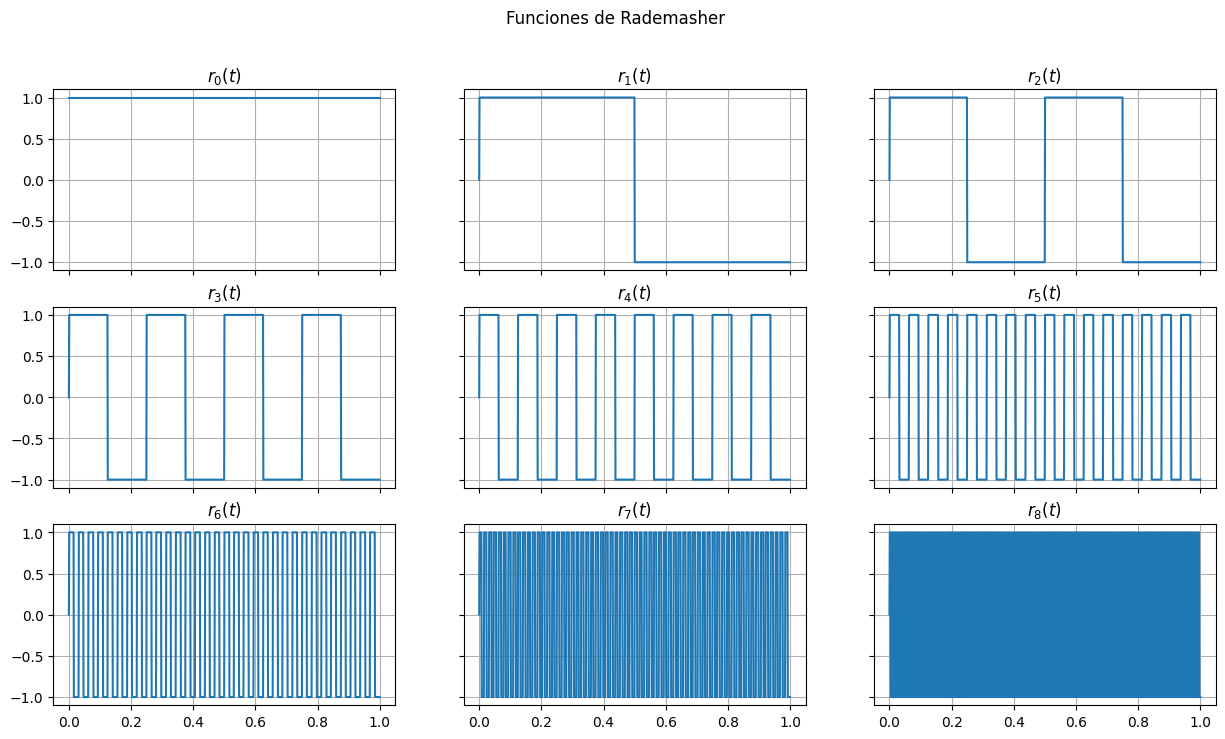

In [2]:
t = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(3, 3,
                       sharex=True,
                       sharey=True,
                       figsize=(15, 8))
for n in range(9):
    ax = fig.axes[n]
    ax.plot(t, r(t, n))
    ax.grid()
    ax.set_title("$r_{}(t)$".format(n))

plt.suptitle("Funciones de Rademasher")
plt.show()

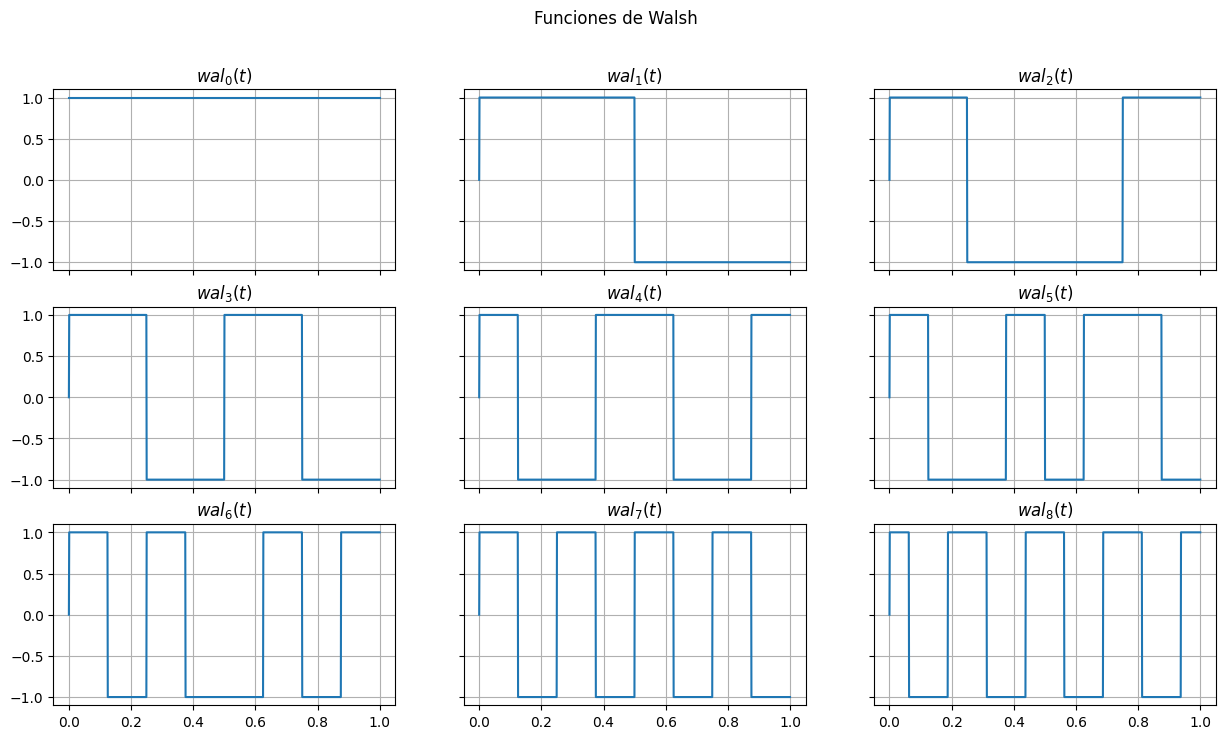

In [3]:
fig, ax = plt.subplots(3, 3,
                       sharex=True,
                       sharey=True,
                       figsize=(15, 8))
for m in range(9):
    ax = fig.axes[m]
    ax.plot(t, walsh(t, m))
    ax.grid()
    ax.set_title("$wal_{}(t)$".format(m))

plt.suptitle("Funciones de Walsh")
plt.show()

<ipython-input-4-07470cc1bcb7>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeffs, use_line_collection=True)


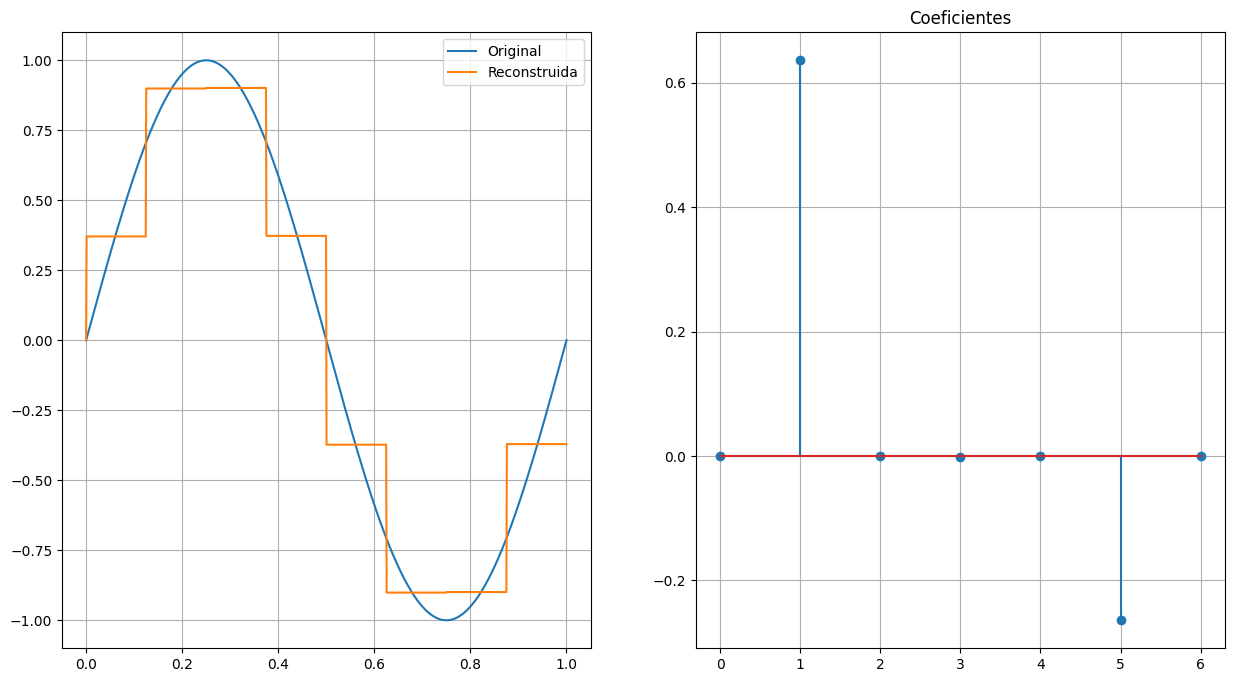

In [4]:
x = np.sin(2*np.pi*t)
coeffs, xr = walsh_transform(x, t, 7)

fig = plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(t, x, t,xr)
plt.legend(labels=["Original", "Reconstruida"])
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(coeffs, use_line_collection=True)
plt.title("Coeficientes")
plt.grid()


plt.show()

<ipython-input-5-d5123d8c654d>:3: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()
<ipython-input-5-d5123d8c654d>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeffs, use_line_collection=True)


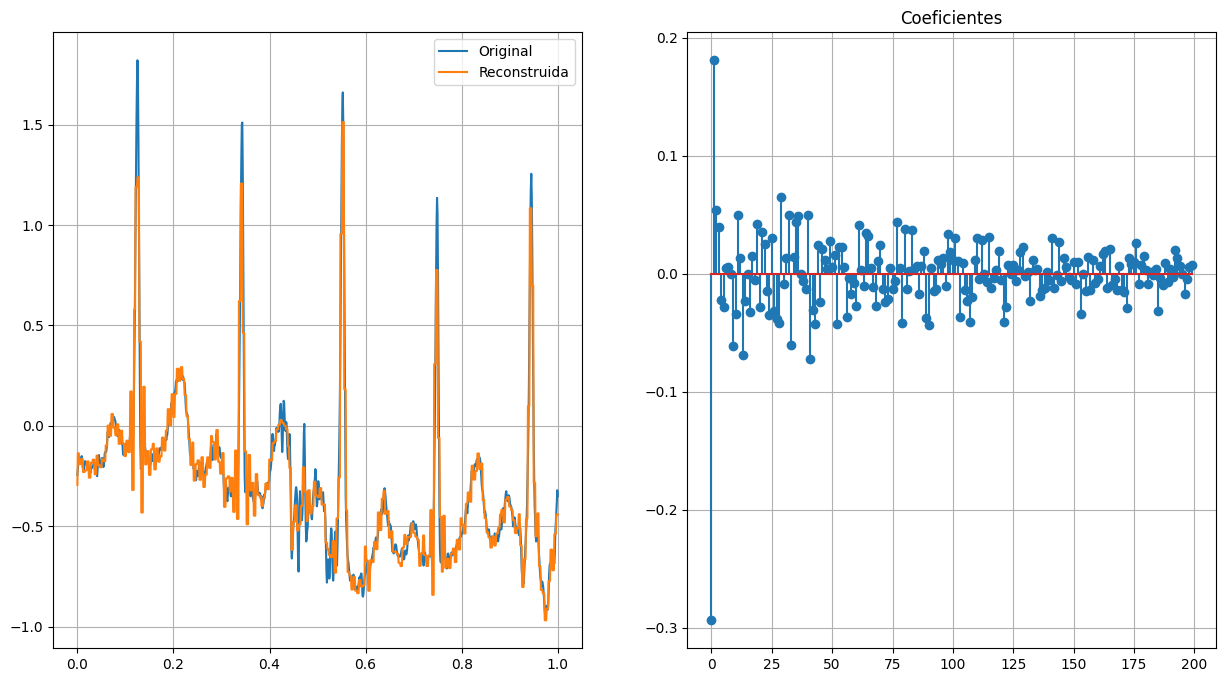

In [5]:
from scipy.misc import electrocardiogram

ecg = electrocardiogram()
x = ecg[:1000]
t = np.linspace(0, 1, 1000)
coeffs, xr = walsh_transform(x, t, 200)

fig = plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(t, x, t,xr)
plt.legend(labels=["Original", "Reconstruida"])
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(coeffs, use_line_collection=True)
plt.title("Coeficientes")
plt.grid()


plt.show()